## **CSE330 Section 03 Special Assignment Summer 2024** (Total Marks : 10)

In [25]:
Name = "Tahmid Iqbal"
ID = "21201701"
Section = "03"
github = " https://github.com/TahmidRaven" 


# Question 01 [1 + 2 + 1.5 + 1.5 Marks]

Consider the following function:
$$ f(x) = x^3 - 6x^2 + 11x -6 $$



1(i) Print and plot the Actual roots, `x*`, of the given function. Round the roots to 4 decimal places.

# Solution 1(i)

In [26]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

 
#given function f(x) = x^3 - 6x^2 + 11x - 6
f = Polynomial([-6, 11, -6, 1])

x = np.linspace(0, 4, 70)
y = f(x)

roots = f.roots()
rounding_root = np.round(roots, 4)

Actual roots (x*): [1. 2. 3.]


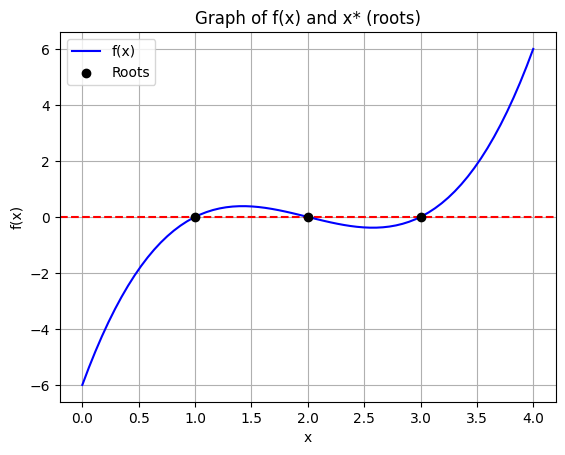

In [27]:

print("Actual roots (x*):", rounding_root)

plt.axhline(0, color='r', linestyle='--')   
plt.plot(x, y, 'b', label='f(x)')  # polynomial
plt.scatter(rounding_root, [0]*len(rounding_root), color='black', zorder=5, label='Roots')  

plt.title('Graph of f(x) and x* (roots)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.grid(True)
plt.show()

**1(ii)** The following $g_{1}(x)$ is given which is derived from the above $f(x)$\
$$g_{1}(x) = \frac{-x^3 +6x^2 + 6}{11}$$\
Use Contraction Mapping Theorem and calculate the value of λ for all the actual roots. Print whether the $g_{1}(x)$ is converging or diverging.





# Solution 1(ii)

In [28]:
# Solution 1(II)

import numpy as np
from numpy.polynomial import Polynomial

def g1(x):
    return (-x**3 + 6*x**2 + 6) / 11

def g1_derivative(x):
    return (-3*x**2 + 12*x) / 11

f = Polynomial([-6, 11, -6, 1])

roots = f.roots()
rounding_root = np.round(roots, 4)

# we know |g'(x*)| < 1 : Converge

#         |g'(x*)| >= 1 : Diverges

for root in rounding_root:
    derivat_at_xroot = g1_derivative(root)
    print(f"g1'({root}) = {derivat_at_xroot:.4f}")
    
    if abs(derivat_at_xroot) < 1:
        print(f"g1(x) converges at x = {root:.4f}\n")
    else:
        print(f"g1(x) diverges at x = {root:.4f}\n")


g1'(1.0) = 0.8182
g1(x) converges at x = 1.0000

g1'(2.0) = 1.0909
g1(x) diverges at x = 2.0000

g1'(3.0) = 0.8182
g1(x) converges at x = 3.0000



**1(iii)** Derive 3 more separate $g_{2}(x)$, $g_{3}(x)$ and $g_{4}(x)$ from the given $f(x)$. Represent those in the code.

# Solution 1(iii)

In [29]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

# Given function f(x) = x^3 - 6x^2 + 11x - 6
f = Polynomial([-6, 11, -6, 1])

In [11]:
def g2(x):
    return (6 + 6*x - 11*x**2)**(1/3)

def g3(x):
    return (6 + x**3) / 11

def g4(x):
    return 6 - (x**3 / 11) + (6 * x**2 / 11)   

def g2_derivative(x):
    return (2 * (11 * x**2 - 3) / (3 * (6 + 6*x - 11*x**2)**(2/3)))

def g3_derivative(x):
    return (3 * x**2) / 11

def g4_derivative(x):
    return (-3 * x**2 + 12 * x) / 11   

roots = f.roots()
rounding_root = np.round(roots, 4)


In [30]:
for root in rounding_root:
    for g, g_derivative, g_index in zip([g2, g3, g4], [g2_derivative, g3_derivative, g4_derivative], [2, 3, 4]):
        derivat_at_xroot = g_derivative(root)
        print(f"g{g_index}'({root}) = {derivat_at_xroot:.4f}")
        
        if abs(derivat_at_xroot) < 1:
            print(f"g{g_index}(x) converges at x = {root:.4f}\n")
        else:
            print(f"g{g_index}(x) diverges at x = {root:.4f}\n")

g2'(1.0) = 5.3333
g2(x) diverges at x = 1.0000

g3'(1.0) = 0.2727
g3(x) converges at x = 1.0000

g4'(1.0) = 0.8182
g4(x) converges at x = 1.0000

g2'(2.0) = nan
g2(x) diverges at x = 2.0000

g3'(2.0) = 1.0909
g3(x) diverges at x = 2.0000

g4'(2.0) = 1.0909
g4(x) diverges at x = 2.0000

g2'(3.0) = nan
g2(x) diverges at x = 3.0000

g3'(3.0) = 2.4545
g3(x) diverges at x = 3.0000

g4'(3.0) = 0.8182
g4(x) converges at x = 3.0000



C:\Users\hp\AppData\Local\Temp\ipykernel_1884\901555750.py:19: RuntimeWarning: invalid value encountered in scalar power
  return (2 * (11 * x**2 - 3) / (3 * (6 + 6*x - 11*x**2)**(2/3)))


**1(iv)** Find the approximate root, `x*`, of the above function using Fixed Point Iterations where $x_{0}$ = 1.1 and any of the converging `g(x)` that you have constructed in 1(iii). Show 20 iterations.

# Solution 1(iv)

In [18]:
import numpy as np
from numpy.polynomial import Polynomial

# Given function f(x) = x^3 - 6x^2 + 11x - 6
f = Polynomial([-6, 11, -6, 1])  # taking pol from gvn func

In [23]:
def g2(x):
    return (6 + 6*x - 11*x**2)**(1/3)

def fixed_point_iter(g, x0, iterations): # Fixed Point func
    xVals = [x0]
    for i in range(iterations):
        x_next = g(xVals[-1])
        xVals.append(x_next)
        
    return xVals

x0 = 1.1
iterations = 20

xVals = fixed_point_iter(g2, x0, iterations)

print("Fixed Point Iterations for g2(x):") 
print("\n")
for i, x in enumerate(xVals):
    print(f"Iteration {i}: x = {x:.6f}")


Fixed Point Iterations for g2(x):


Iteration 0: x = 1.100000
Iteration 1: x = 0.446056+0.772592j
Iteration 2: x = 2.367643-0.175504j
Iteration 3: x = 1.927706+2.889421j
Iteration 4: x = 4.735295-1.628055j
Iteration 5: x = 4.312077+4.511198j
Iteration 6: x = 6.553643-3.422379j
Iteration 7: x = 6.241258+5.377321j
Iteration 8: x = 7.578843-4.700175j
Iteration 9: x = 7.395661+5.782441j
Iteration 10: x = 8.093816-5.421520j
Iteration 11: x = 7.998652+5.967303j
Iteration 12: x = 8.341254-5.788382j
Iteration 13: x = 8.294625+6.051992j
Iteration 14: x = 8.458017-5.966250j
Iteration 15: x = 8.435791+6.091048j
Iteration 16: x = 8.512689-6.050603j
Iteration 17: x = 8.502231+6.109137j
Iteration 18: x = 8.538200-6.090199j
Iteration 19: x = 8.533309+6.117535j
Iteration 20: x = 8.550086-6.108698j


#Question 02 [4 Marks]

Consider the following function:
$$ f(x) = 5x^6-x^5+7x^4+3.75x^3-2x^2+1.5x+15 $$
Now, compute the Second Degree Richarson Extrapolation, `D^{2}` at `x = 1` and `h = 0.3` when the formula is derived using `h -> h/4`. Print the answer upto 2 decimal places.


**N.B.** You can use the previously learned methods while solving the problem.

# Solution for Q02:
### used polynomials instead of taking the function. would give the same result nonetheless

In [9]:
import numpy as np
from numpy.polynomial import Polynomial

given_func = Polynomial([15, 1.5, -2, 3.75, 7, -1, 5])  # our function in polynomial form

def dh(f, h, x):
    return (f(x + h) - f(x - h)) / (2 * h)  # used central def 

def dh1(f, h, x):   # first degree RE
    dh_h = dh(f, h, x)
    dh_h4 = dh(f, h / 4, x)
    return (4 * dh_h4 - dh_h) / 3

 
def dh2(f, h, x): # sec degree RE
    dh1_h = dh1(f, h, x)
    dh1_h4 = dh1(f, h / 4, x)
    return (16 * dh1_h4 - dh1_h) / 15

 
x = 1
h = 0.3
second_degree_derivative = dh2(given_func, h, x)
first_degree_derivative = dh1(given_func, h, x)
print(f"Second Degree Richardson Extrapolation at x = {x}, h = {h}: {second_degree_derivative:.2f}")
print(f"First Degree Richardson Extrapolation at x = {x}, h = {h}: {first_degree_derivative:.2f}")


Second Degree Richardson Extrapolation at x = 1, h = 0.3: 61.75
First Degree Richardson Extrapolation at x = 1, h = 0.3: 58.93


### same solution diff approach: instead of polinomials we take the function

In [10]:
import numpy as np
from numpy.polynomial import Polynomial

def f(x):
    return 5*x**6 - x**5 + 7*x**4 + 3.75*x**3 - 2*x**2 + 1.5*x + 15

def dh(f, h, x):
    return (f(x + h) - f(x - h)) / (2 * h)  # used central def 

def dh1(f, h, x):   # first degree RE
    dh_h = dh(f, h, x)
    dh_h4 = dh(f, h / 4, x)
    return (4 * dh_h4 - dh_h) / 3

 
def dh2(f, h, x): # sec degree RE
    dh1_h = dh1(f, h, x)
    dh1_h4 = dh1(f, h / 4, x)
    return (16 * dh1_h4 - dh1_h) / 15

 
x = 1
h = 0.3
second_degree_derivative = dh2(f, h, x)
first_degree_derivative = dh1(f, h, x)
print(f"Second Degree Richardson Extrapolation at x = {x}, h = {h}: {second_degree_derivative:.2f}")
print(f"First Degree Richardson Extrapolation at x = {x}, h = {h}: {first_degree_derivative:.2f}")


Second Degree Richardson Extrapolation at x = 1, h = 0.3: 61.75
First Degree Richardson Extrapolation at x = 1, h = 0.3: 58.93
